In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from census import Census
from config import gkey,census_key

In [2]:
fire_data_df = pd.read_csv("Fire_Data.csv",low_memory=False)
fire_data_df.head()

,FPA_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY
0,FS-1418826,FOUNTAIN,2005,2453403.5,Miscellaneous,2453403.5,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63
1,FS-1418827,PIGEON,2004,2453137.5,Lightning,2453137.5,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61
2,FS-1418835,SLACK,2004,2453156.5,Debris Burning,2453156.5,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17
3,FS-1418845,DEER,2004,2453184.5,Lightning,2453189.5,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3
4,FS-1418847,STEVENOT,2004,2453184.5,Lightning,2453189.5,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3


In [3]:
yr_state_grp = fire_data_df.groupby(["FIRE_YEAR","STATE"])
avg_fire_size_df = pd.DataFrame(yr_state_grp.FIRE_SIZE.mean()).reset_index()

In [4]:
avg_fire_size_pivot = avg_fire_size_df.pivot("FIRE_YEAR","STATE").unstack(fill_value=0)
avg_fire_size_pivot.FIRE_SIZE

STATE  FIRE_YEAR
AK     1992          296.709771
       1993          798.131823
       1994          409.320156
       1995          105.172488
       1996          833.979387
       1997         2810.269764
       1998          296.034559
       1999         2086.812656
       2000         2077.964835
       2001          609.209695
       2002         4064.397955
       2003         1258.732238
       2004         9498.369741
       2005         7489.335464
       2006          845.560797
       2007         1236.776023
       2008          250.616802
       2009         5749.695848
       2010         1646.212258
       2011          576.779724
       2012          734.931540
       2013         2231.012331
       2014          594.405293
       2015         6662.391388
AL     1992           13.475269
       1993           17.056934
       1994           10.041831
       1995            9.195414
       1996           11.779447
       1997            8.512312
                       

In [5]:
years = np.arange(fire_data_df.FIRE_YEAR.min(),fire_data_df.FIRE_YEAR.max()+1)
years

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015], dtype=int64)

In [6]:
ca_avg_fire_size = avg_fire_size_pivot.loc[:,["CA"]]
ga_avg_fire_size = avg_fire_size_pivot.loc[:,["GA"]]
tx_avg_fire_size = avg_fire_size_pivot.loc[:,["TX"]]
nc_avg_fire_size = avg_fire_size_pivot.loc[:,["NC"]]

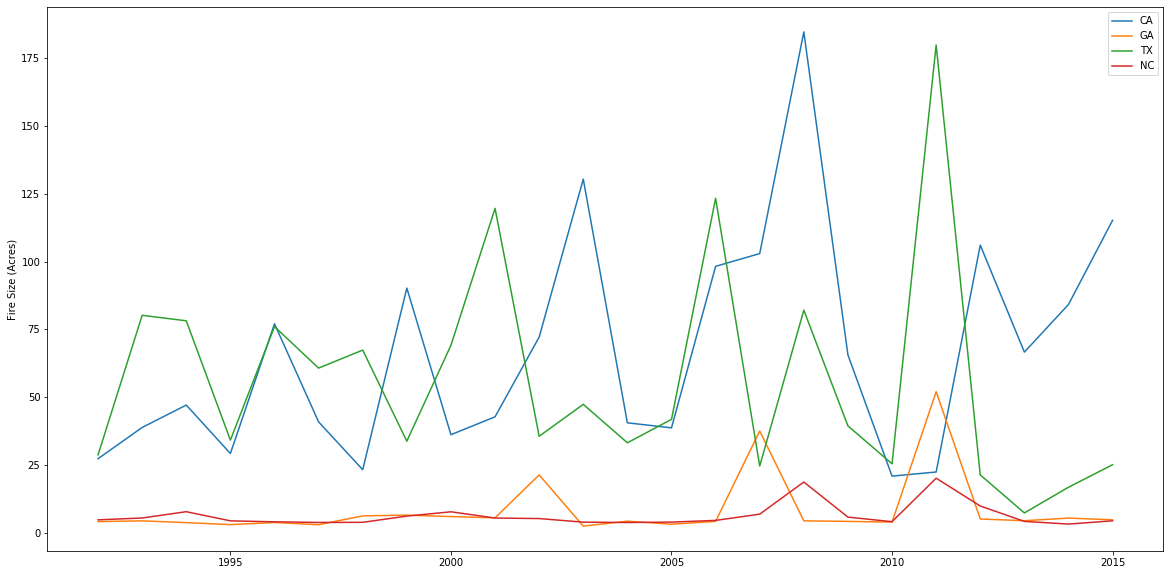

In [7]:
plt.figure(figsize=(20,10))
ca, = plt.plot(years,ca_avg_fire_size,label="CA")
ga, = plt.plot(years,ga_avg_fire_size,label="GA")
tx, = plt.plot(years,tx_avg_fire_size,label="TX")
nc, = plt.plot(years,nc_avg_fire_size,label="NC")

plt.legend(handles=[ca,ga,tx,nc])
plt.ylabel("Fire Size (Acres)")
plt.show()

In [8]:
fire_data_df.STAT_CAUSE_DESCR.value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

In [19]:
ca_fire_cause = fire_data_df[fire_data_df["STATE"] == "CA"]["STAT_CAUSE_DESCR"]
ga_fire_cause = fire_data_df[fire_data_df["STATE"] == "GA"]["STAT_CAUSE_DESCR"]
tx_fire_cause = fire_data_df[fire_data_df["STATE"] == "TX"]["STAT_CAUSE_DESCR"]
nc_fire_cause = fire_data_df[fire_data_df["STATE"] == "NC"]["STAT_CAUSE_DESCR"]

In [22]:
ca_pie = ca_fire_cause.value_counts()

Miscellaneous        51943
Equipment Use        39407
Lightning            27000
Arson                19635
Debris Burning       14318
Missing/Undefined    12605
Campfire              9516
Children              6930
Smoking               5936
Powerline             1198
Railroad               720
Fireworks              219
Structure              123
Name: STAT_CAUSE_DESCR, dtype: int64

In [23]:
cause = ["Miscellaneous", "Equipment Use", "Lightning", "Arson", "Debris Burning", "Missing/Undefined", "Campfire", "Children", "Smoking", "Powerline", "Railroad", "Fireworks", "Structure"]
cause_tally = [51943,39407,27000,19635,14318,12605,9516,6930,5936,1198,720,219,123]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","seashell","royalblue","crimson"]
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0)

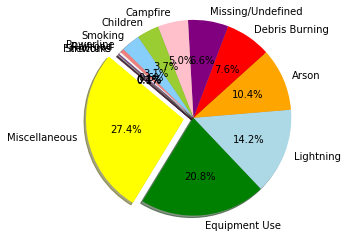

In [24]:
plt.pie(cause_tally, explode=explode, labels=cause, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

In [25]:
ga_fire_cause.value_counts()

Debris Burning       88199
Arson                29757
Equipment Use        13546
Miscellaneous        11017
Lightning             7748
Children              7203
Smoking               4994
Campfire              3338
Railroad              3050
Missing/Undefined       10
Powerline                3
Structure                2
Name: STAT_CAUSE_DESCR, dtype: int64

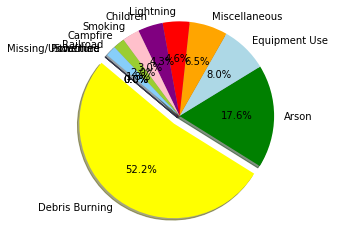

In [29]:
cause = ["Debris Burning", "Arson", "Equipment Use", "Miscellaneous", "Lightning" , "Children", "Smoking", "Campfire", "Railroad", "Missing/Undefined", "Powerline", "Structure"]
cause_tally = [88199,29757,13546,11017,7748,7203,4994,3338,3050,10,3,2]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","seashell","royalblue"]
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,)

plt.pie(cause_tally, explode=explode, labels=cause, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

In [28]:
tx_fire_cause.value_counts()

Debris Burning       56172
Miscellaneous        39822
Equipment Use        16067
Arson                 9224
Lightning             6797
Powerline             4351
Smoking               3903
Campfire              1792
Children              1519
Railroad              1123
Missing/Undefined      973
Fireworks              266
Structure               12
Name: STAT_CAUSE_DESCR, dtype: int64

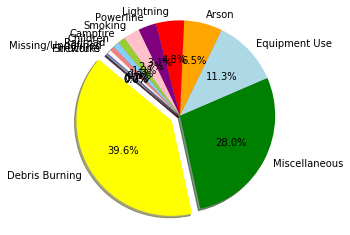

In [30]:
cause = ["Debris Burning", "Miscellaneous", "Equipment Use", "Arson", "Lightning" , "Powerline", "Smoking", "Campfire", "Children", "Railroad", "Missing/Undefined", "Fireworks", "Structure"]
cause_tally = [56172,39822,16067,9224,6797,4351,3903,1792,1519,1123,973,266,12]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","seashell","royalblue", "crimson"]
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0)


plt.pie(cause_tally, explode=explode, labels=cause, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

In [31]:
nc_fire_cause.value_counts()

Debris Burning       39020
Arson                18059
Missing/Undefined    16397
Miscellaneous        12460
Equipment Use         7611
Children              7608
Smoking               6164
Lightning             1934
Railroad              1082
Campfire               588
Fireworks              240
Powerline               96
Structure               18
Name: STAT_CAUSE_DESCR, dtype: int64

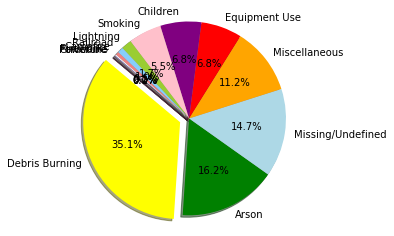

In [32]:
cause = ["Debris Burning", "Arson", "Missing/Undefined", "Miscellaneous", "Equipment Use" , "Children", "Smoking", "Lightning", "Railroad", "Campfire", "Fireworks", "Powerline", "Structure"]
cause_tally = [39020,18059,16397,12460,7611,7608,6164,1934,1082,588,240,96,18]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","seashell","royalblue", "crimson"]
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0)


plt.pie(cause_tally, explode=explode, labels=cause, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

In [9]:
fire_data_df.FIRE_SIZE_CLASS.value_counts()

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64

In [10]:
fire_data_df.STATE.value_counts()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64

In [11]:
counties = []
for x in fire_data_df["COUNTY"]:
    if x not in counties and str(x) != 'nan':
        counties.append(x)
len(counties)

3455

In [12]:
states = []
for x in fire_data_df["STATE"]:
    if x not in states and str(x) != 'nan':
        states.append(x)
len(states)

52

In [13]:
# Census API Key
c = Census(census_key, year=2013)

census_data = c.acs5.get(("B01003_001E"), {
                         'for': 'county:*'})
# Convert to DataFrame
census_df = pd.DataFrame(census_data)
census_df

,B01003_001E,county,state
0,9699.0,083,72
1,29086.0,011,72
2,41798.0,131,72
3,204725.0,021,72
4,27669.0,033,72
5,19019.0,055,72
6,87161.0,097,72
7,54907.0,001,01
8,187114.0,003,01
9,27321.0,005,01


In [14]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [15]:
# Store locations 
fire_locations = fire_data_df[["LATITUDE", "LONGITUDE"]].astype(float)

# Convert to float and store
fire_size = fire_data_df["FIRE_SIZE"].astype(float)

In [16]:
# Create a Heatmap layer
fig = gmaps.figure(map_type="TERRAIN")

In [17]:
fire_layer = gmaps.heatmap_layer(fire_locations, weights=fire_size, 
                                 dissipating=False, max_intensity=1000,
                                 point_radius = .05)

In [18]:
fig.add_layer(fire_layer)

fig

Figure(layout=FigureLayout(height='420px'))